Se deben crear una función que reciba el tamaño N y el número de repeticiones NREP para retornar el tiempo promedio y la desviación estándar de ese tiempo promedio que se demora en resolver un sistema de la forma A x = b 
Solamente se debe medir el tiempo que se toma en resolver el sistema, no en crear la matriz o el vector. 
Se debe graficar este tiempo promedio (y la desviación estándar como barras de error), normalizado por el obtenido para N=100, en función del tamaño del sistema. Los valores a explorar son N = 10, 20, 50, 80, 100, 200, 500, 700, 1000, 2000, 5000, 8000, 10000, 20000, 50000.

In [ ]:
import time 
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def execution_time(N,NREPS): 

    #tm = np.arange(NREPS) # ES ENTERO!!!! Trunca todo a zero
    tm = np.zeros(NREPS)

    def sys(N):
      
        A = np.random.rand(N, N)
        b = np.random.rand(N)
        start = time.perf_counter()
        linalg.solve(A,b)
        end = time.perf_counter()
        print(f"{start}, {end}")
        print(f"{end - start}")
        return end - start
        
    
    for i in range(NREPS):
        
        tm[i] = sys(N)

    print(tm)

    mean = np.mean(tm)
    std = np.std(tm)

    return mean,std

execution_time = np.vectorize(execution_time)

In [ ]:
def execution_timeM(N,NREPS,PRE): 

    
    Ns = np.arange(N,dtype= np.int64)

    def sys(N):
      
        A = np.random.rand(N, N)
        b = np.random.rand(N)
        start = time.perf_counter()
        linalg.solve(A,b)
        end = time.perf_counter()

        cero = np.zeros(1)
        result = np.array([end - start])


        if np.isclose(result,cero,atol=PRE):
            result = np.array([end - start])
        
        else:
            result = 0
        return result
    
    sys = np.vectorize(sys)
   
    tm = sys(Ns)
    
    mean = np.mean(tm)
    std = np.std(tm)

    return mean,std

execution_timeM = np.vectorize(execution_timeM)

In [ ]:
def grafica_error(x,y,y_err):

    fig,ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(" Tiempo de resolución vs Numero de semilla ")


    plt.errorbar(x, y, yerr=y_err)  

    plt.xlabel("Numero de semilla")
    plt.ylabel('Tiempo de resolución (s)')
    
    plt.xscale("log")
    plt.yscale("log")

    plt.savefig("Figura.pdf")

1243.164967923, 1243.1654664
0.0004984770000646677
1243.165620852, 1243.165769723
0.0001488709999648563
[0.00049848 0.00014887]
1243.166398944, 1243.166515562
0.0001166179999927408
1243.166613325, 1243.166726309
0.00011298399999759567
[0.00011662 0.00011298]
1243.167177409, 1243.167304363
0.00012695400005213742
1243.167385251, 1243.167489818
0.0001045669998802623
[0.00012695 0.00010457]
1243.167972561, 1243.168207616
0.00023505500007559021
1243.168326806, 1243.168526418
0.0001996119999603252
[0.00023506 0.00019961]
1243.169073081, 1243.170920916
0.0018478349998076737
1243.171091984, 1243.171485981
0.00039399699994646653
[0.00184783 0.000394  ]
1243.181353194, 1243.183947377
0.002594183000155681
1243.184215728, 1243.185888287
0.0016725589998713986
[0.00259418 0.00167256]
1243.186986051, 1243.190345031
0.0033589800000299874
1243.191323852, 1243.193862648
0.002538795999953436
[0.00335898 0.0025388 ]
1243.200106795, 1243.211583877
0.011477082000055816
1243.217440119, 1243.228771242
0.01133

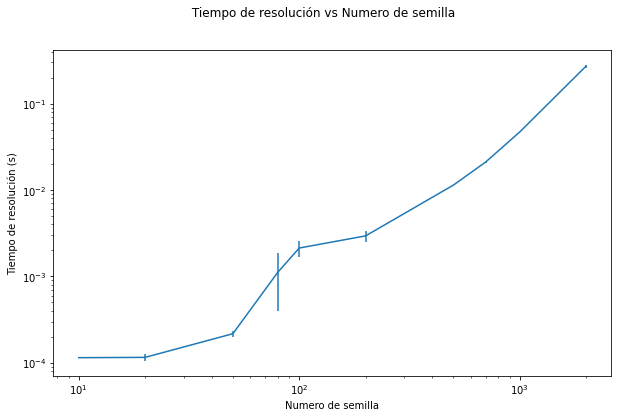

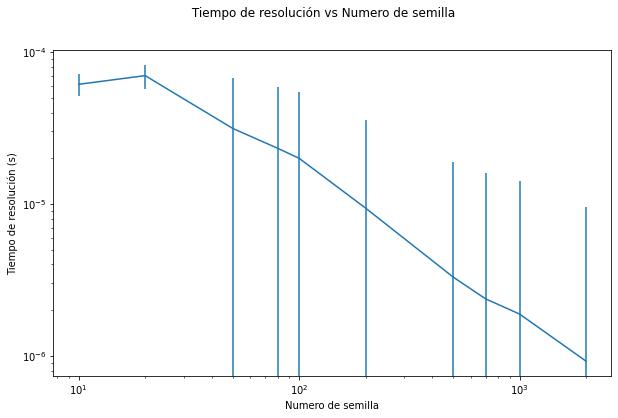

In [ ]:
PRE = 0.0001
NREPS = 2
N = [10, 20, 50, 80, 100, 200, 500, 700, 1000, 2000]#, 1000, 2000, 5000], 8000, 10000, 20000, 50000]
#N = [500, 700, 1000, 2000]#, 1000, 2000, 5000], 8000, 10000, 20000, 50000]

NREPSa = np.array(NREPS)
Na = np.array(N)

#Nm, NREPSm = np.meshgrid(Na, NREPSa, sparse=True)

means,stds = execution_time(N,NREPS)
meansM,stdsM = execution_timeM(N,NREPS,PRE)


#grafica_error(N,means,stds)


#<means,stds = execution_time(Nm,NREPSm)
#means,stds = execution_timeM(Nm,NREPSm,PRE)

#print(means)
grafica_error(N,means,stds)
grafica_error(N,meansM,stdsM)
